In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv("Общепит Москва.csv", sep = ";")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17735 entries, 0 to 17734
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   17735 non-null  object
 1   Name                 17735 non-null  object
 2   global_id            17735 non-null  object
 3   IsNetObject          17735 non-null  object
 4   OperatingCompany     3484 non-null   object
 5   TypeObject           17735 non-null  object
 6   AdmArea              17735 non-null  object
 7   District             17735 non-null  object
 8   Address              17735 non-null  object
 9   PublicPhone          17633 non-null  object
 10  SeatsCount           17735 non-null  object
 11  SocialPrivileges     17735 non-null  object
 12  Longitude_WGS84      17735 non-null  object
 13  Latitude_WGS84       17735 non-null  object
 14  ID_en                1 non-null      object
 15  Name_en              1 non-null      object
 16  IsNe

In [10]:
df = df.drop(['global_id', 'Longitude_WGS84', 'Latitude_WGS84', 'ID_en', 'Name_en', 'IsNetObject_en', 'OperatingCompany_en',
              'TypeObject_en', 'AdmArea_en', 'District_en', 'Address_en', 'PublicPhone_en', 'SeatsCount_en', 'SocialPrivileges_en',
              'Longitude_WGS84_en', 'Latitude_WGS84_en', 'geodata_center', 'geoarea'], axis = 1)
df = df.drop(index = 0)
df = df[df['SeatsCount'] != "0"]
df = df[df['IsNetObject'] != ""]
df = df[df['TypeObject'] != ""]
df = df[df['SocialPrivileges'] != "" ]
print(df.head(20))
print(df.info())

           ID                                               Name IsNetObject  \
1    00151635                                            СМЕТАНА         нет   
2   000077874                                             Родник         нет   
3   000024309                                    Кафе «Академия»         нет   
4   000027429  ГБОУ «Школа № 1430 имени Героя Социалистическо...         нет   
5    00148815                                           Брусника          да   
6   000020957                                        Буфет МТУСИ         нет   
7   000028858                                     Столовая МТУСИ         нет   
8   000023394                                       Кафе Гогиели         нет   
9   000022579                                         Алло Пицца          да   
10  000023670                                    ГБОУ ШКОЛА 1542         нет   
11  000023663                                    ГБОУ Школа 1542         нет   
13  000058565                           

In [11]:
b = [1, 3, 5, 10, -2]
a = np.array(b)
print(b)
for i in range(len(b)):
    b[i] += 10
print(b)

print(a)
a += 10
print(a)
c = []
for i in range(len(b)):
    if b[i] > 12:
        c += [b[i]]
print(c)
print()
print(a>12)
print(a[a>12])

[1, 3, 5, 10, -2]
[11, 13, 15, 20, 8]
[ 1  3  5 10 -2]
[11 13 15 20  8]
[13, 15, 20]

[False  True  True  True False]
[13 15 20]


In [12]:
df['SeatsCount'] = df['SeatsCount'].astype(int)

In [13]:
df.SocialPrivileges.describe()
#Можно сделать вывод, что социальных льгот в большинстве общепитов города Москва нет

count     14647
unique        2
top         нет
freq      14392
Name: SocialPrivileges, dtype: object

In [14]:
df.IsNetObject.describe()
#Также можно заметить, что в основном на улицах москвы преобладают не 
#сетевые заведения общепита

count     14647
unique        2
top         нет
freq      11707
Name: IsNetObject, dtype: object

In [15]:
for i in df.groupby('SocialPrivileges'):
    print(i)

('да',               ID                                               Name  \
16     000028751                            ГБОУ Школа № 1411 (970)   
18     000029223  СТОЛОВАЯ ПРИ ГУП ОБЪЕДИНЕННЫЙ КОМБИНАТ ШКОЛЬНО...   
19     000027439                                         ШКОЛА 1444   
21     000024387                                             Готика   
57     000028754                            ГБОУ Школа № 1411 (267)   
...          ...                                                ...   
10008   00273796                                       Свадьба соек   
10012   00273804                                             Космос   
11611  000025446                                           Андерсон   
13397  000022908                                         Local cafe   
13902   00309389                                 Пивной бар Карасик   

      IsNetObject OperatingCompany TypeObject  \
16            нет              NaN   столовая   
18            нет              NaN   столо

In [16]:
RePhraseList = list()
df['SocialPrivileges'] = df['SocialPrivileges'].replace("да", 1)
df['SocialPrivileges'] = df['SocialPrivileges'].replace("нет", 0)
df.groupby('TypeObject').agg('sum').sort_values('SocialPrivileges')[['SocialPrivileges']]

,SocialPrivileges
TypeObject,
магазин (отдел кулинарии),0
предприятие быстрого обслуживания,0
бар,1
закусочная,1
кафетерий,2
ресторан,4
кафе,17
буфет,19
столовая,211


In [17]:
def perc(x):
    return sum(x)/255*100
stats = df.groupby('TypeObject').agg(['sum', perc])[["SocialPrivileges"]]
stats.columns = ['SocialPrivilegesCount', "SocialPrivilegesPerc"]
labels = list()
for i in range(len(stats['SocialPrivilegesPerc'])):
    if stats['SocialPrivilegesCount'][i] == 0:
        labels.append("")
    else:
        labels.append(stats['SocialPrivilegesPerc'].index[i])
stats.sort_values('SocialPrivilegesPerc')

C:\Users\zhash\AppData\Local\Temp\ipykernel_10004\3828578434.py:3: FutureWarning: ['ID', 'Name', 'IsNetObject', 'OperatingCompany', 'AdmArea', 'District', 'Address', 'PublicPhone'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats = df.groupby('TypeObject').agg(['sum', perc])[["SocialPrivileges"]]


,SocialPrivilegesCount,SocialPrivilegesPerc
TypeObject,,
магазин (отдел кулинарии),0,0.000000
предприятие быстрого обслуживания,0,0.000000
бар,1,0.392157
закусочная,1,0.392157
кафетерий,2,0.784314
ресторан,4,1.568627
кафе,17,6.666667
буфет,19,7.450980
столовая,211,82.745098


In [18]:
RePhraseList = list()
bar = df.groupby('TypeObject').agg('mean').sort_values('SeatsCount')[['SeatsCount']]
names = list()
for i in range(len(bar)):
    names.append(bar.index[i])
df.groupby('TypeObject').agg('mean').sort_values('SeatsCount')[['SeatsCount']]

,SeatsCount
TypeObject,
кафетерий,10.401925
магазин (отдел кулинарии),11.689474
закусочная,12.000000
предприятие быстрого обслуживания,30.051539
кафе,34.241236
бар,36.956298
буфет,57.000000
ресторан,90.533947
столовая,131.375232


In [19]:
places = df.groupby('AdmArea').agg(['count', 'sum'])[['SeatsCount']]
places.columns = ['Кол-во заведений', 'Сумма посадочных мест']
places.sort_values('Сумма посадочных мест')


,Кол-во заведений,Сумма посадочных мест
AdmArea,,
Троицкий административный округ,139,5677
Новомосковский административный округ,534,14702
Зеленоградский административный округ,237,15943
Северо-Западный административный округ,679,42505
Юго-Восточный административный округ,962,53808
Северный административный округ,1291,64235
Юго-Западный административный округ,1195,65975
Восточный административный округ,1070,69710
Западный административный округ,1298,81149


<AxesSubplot:xlabel='Кол-во заведений', ylabel='Сумма посадочных мест'>

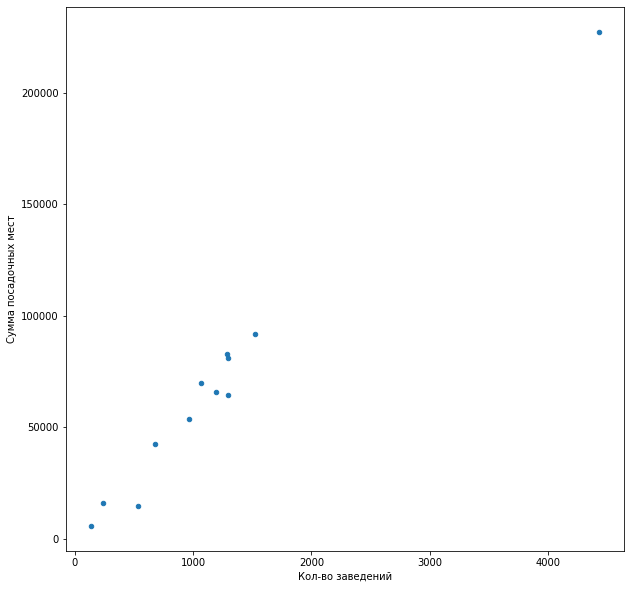

In [20]:
places.plot.scatter('Кол-во заведений', 'Сумма посадочных мест', figsize = (10, 10))
#С помощью функции построения диаграмм у датафрейма

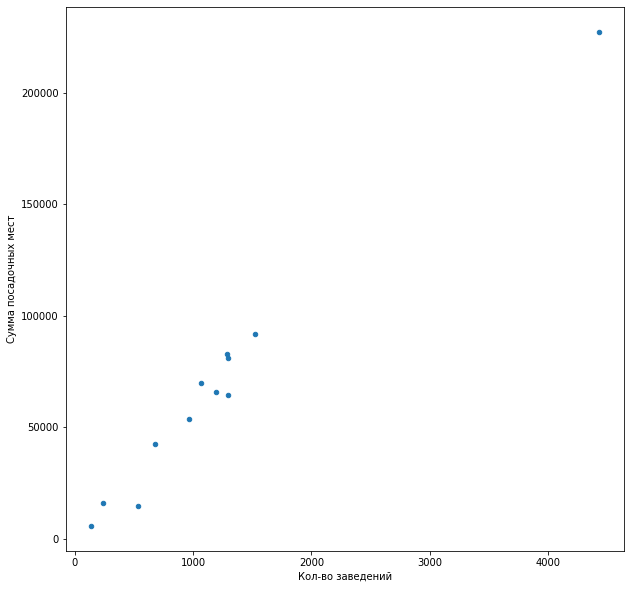

In [21]:
Fig, ax = plt.subplots(figsize = (10, 10))
ax.set_xlabel("Кол-во заведений")
ax.set_ylabel("Сумма посадочных мест")
ax.scatter(x = places['Кол-во заведений'], y = places['Сумма посадочных мест'], s = 20)

Text(0.5, 1.0, 'Кол-во социальных привелегий')

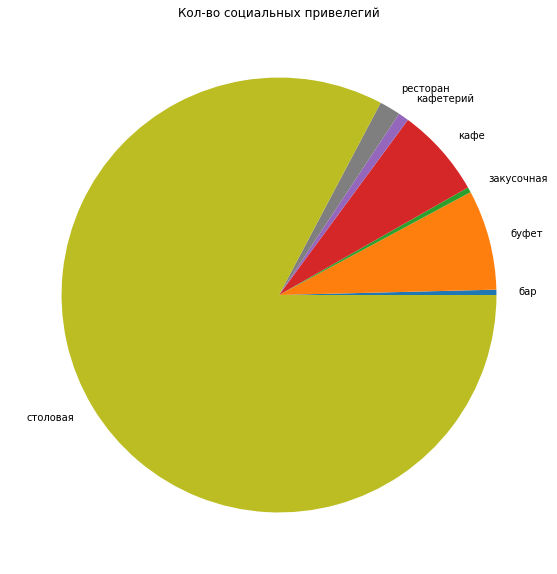

In [52]:
stats['SocialPrivilegesCount'].plot.pie(figsize = (10,10)).set_ylabel("")
plt.title('Кол-во социальных привелегий')

Text(0.5, 1.0, 'Кол-во социальных привилегий')

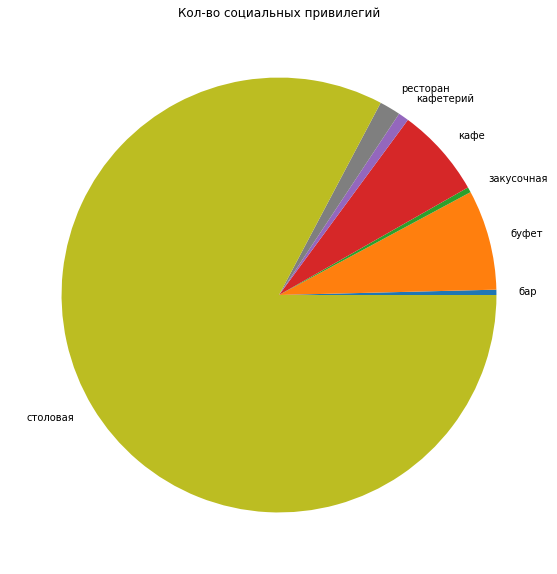

In [56]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.pie(stats['SocialPrivilegesCount'], labels = labels)
plt.title("Кол-во социальных привилегий")

Text(0, 0.5, 'Кол-во посадочных мест')

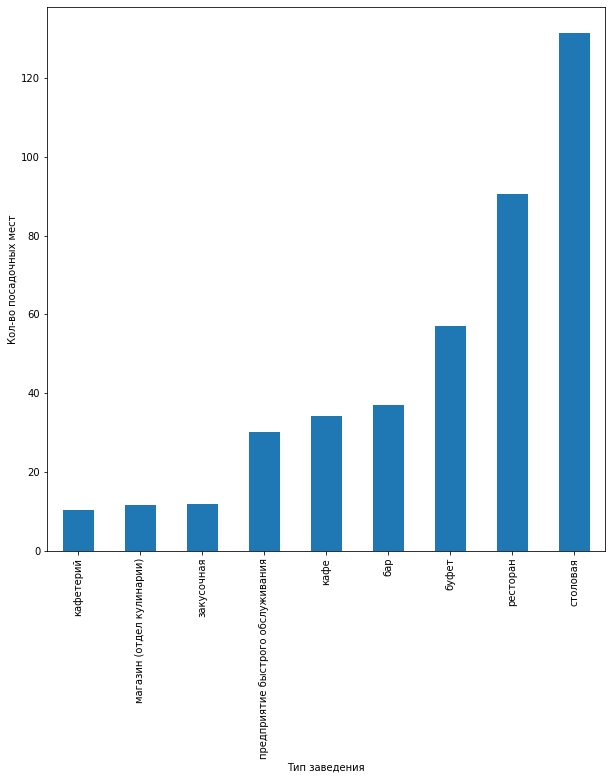

In [31]:
z = bar['SeatsCount'].plot.bar(figsize = (10, 10))
z.set_xlabel('Тип заведения')
z.set_ylabel('Кол-во посадочных мест')

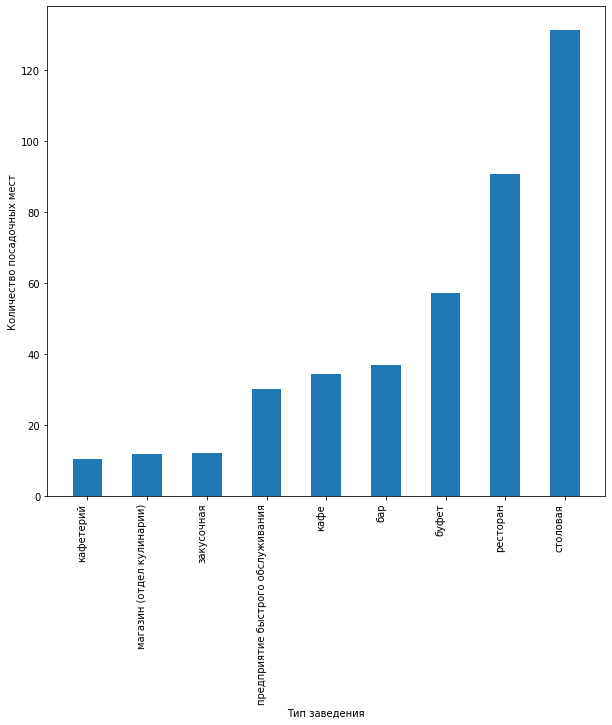

In [32]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.bar(names, bar['SeatsCount'], width = 0.5)
ax.set_xlabel('Тип заведения')
ax.set_ylabel('Количество посадочных мест')
fig.autofmt_xdate(rotation = 90)
#plt.xticks(rotation = 90) ещё один способ, но выводится текст